#MEDICAL CHATBOT

#Load the Training Dataset

In [1]:
import pandas as pd

# Load the training dataset
training_data = pd.read_csv("/content/Training.csv")


#Check the Shape of the Dataset

In [2]:
# Check the shape of the training dataframe
print("The shape of the training dataframe is:", training_data.shape)


The shape of the training dataframe is: (4920, 133)


#Check Data Types

In [3]:
# Check the data types of the columns in the training dataset
print("The data types of the training dataframe are:")
print(training_data.dtypes)


The data types of the training dataframe are:
itching                  int64
skin_rash                int64
nodal_skin_eruptions     int64
continuous_sneezing      int64
shivering                int64
                         ...  
inflammatory_nails       int64
blister                  int64
red_sore_around_nose     int64
yellow_crust_ooze        int64
prognosis               object
Length: 133, dtype: object


#Check for Missing Values

In [4]:
# Check for missing values in the training dataset
print("The number of missing values in the training dataframe is:", training_data.isnull().sum().sum())


The number of missing values in the training dataframe is: 0


#Unique Prognosis Labels

In [15]:
# Get the list of unique prognosis labels
prognosis_labels = training_data["prognosis"].unique()


In [18]:
# Count the number of examples for each prognosis label
training_data["Label_Count"] = training_data.groupby("prognosis")["prognosis"].transform("count")


In [19]:
# Sort the prognosis labels by example count in descending order
training_data = training_data.sort_values(by="Label_Count", ascending=False)


In [20]:
# Print the top 10 prognosis labels with the most examples
print("The top 10 prognosis labels with the most examples are:")
print(training_data[["prognosis", "Label_Count"]].drop_duplicates().head(10))


The top 10 prognosis labels with the most examples are:
               prognosis  Label_Count
0       Fungal infection          120
10               Allergy          120
75             Diabetes           120
37   Chronic cholestasis          120
22                  GERD          120
60                  AIDS          120
40         Drug Reaction          120
50   Peptic ulcer diseae          120
153              Malaria          120
87       Gastroenteritis          120


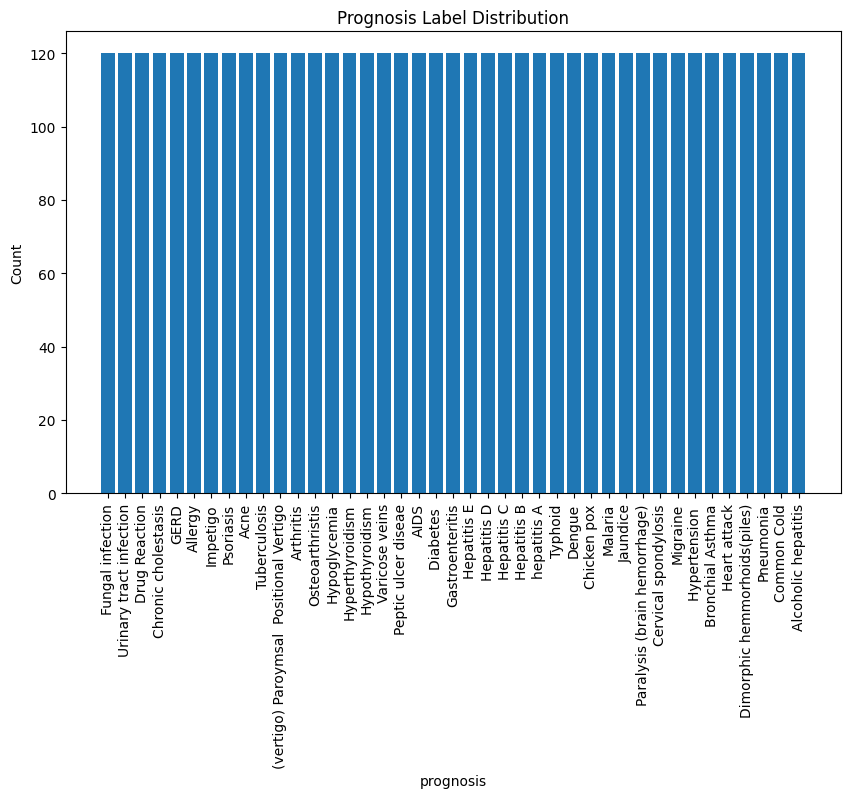

In [22]:
import matplotlib.pyplot as plt

# Create a bar chart to visualize the label distribution
plt.figure(figsize=(10, 6))
plt.bar(prognosis_labels, training_data["Label_Count"].drop_duplicates())
plt.xlabel("prognosis")
plt.ylabel("Count")
plt.title("Prognosis Label Distribution")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


The top 10 "Prognosis" labels with the highest number of associated examples.

<ipython-input-35-0bdb658cc183>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = training_data.iloc[:, 1:-1].corr()


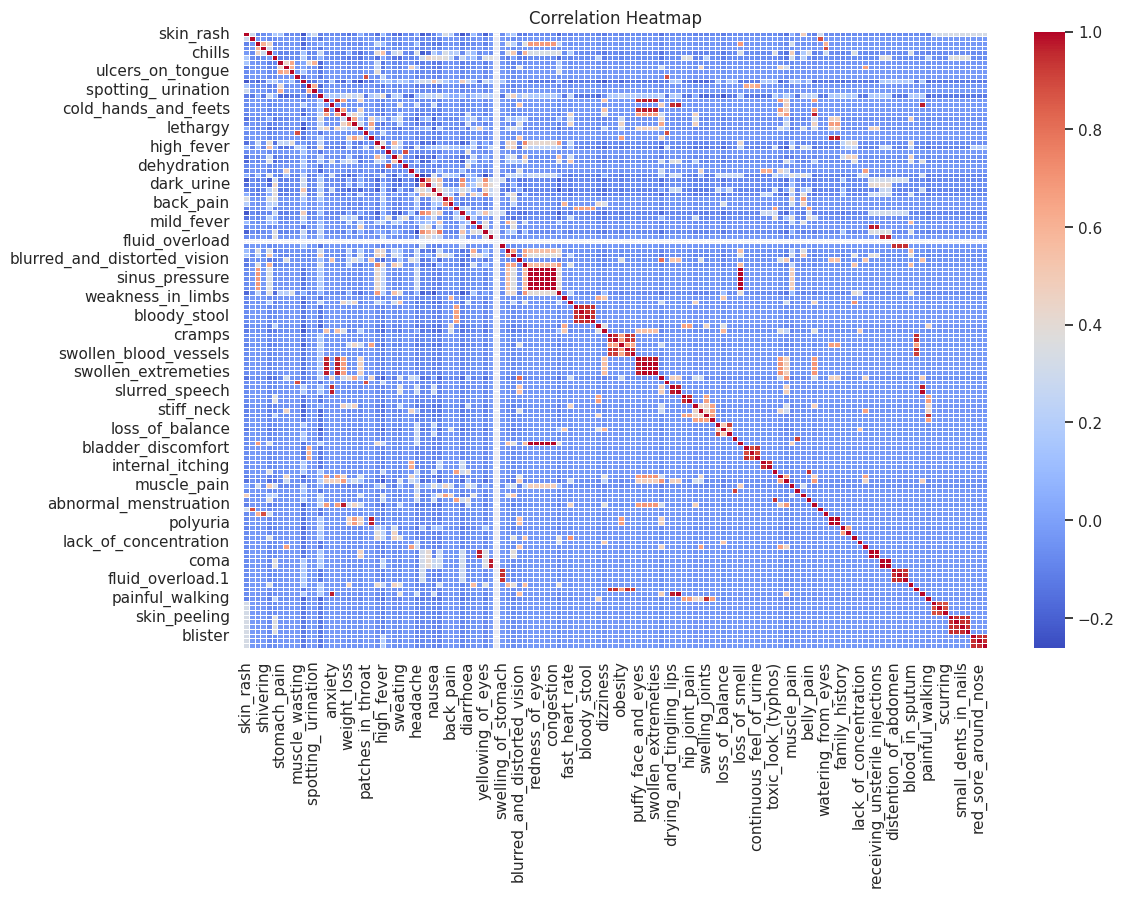

In [35]:
# Calculate the correlation between symptoms and prognosis labels
correlation_matrix = training_data.iloc[:, 1:-1].corr()

# Visualize the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

